# Install And Import Necessary Libreries

In [1]:
!pip install watson-machine-learning-client
!pip install ibm_watson_machine_learning

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 879.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 469.3 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 397.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 851.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.8/956.8 kB 4.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 945.4 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl si

In [2]:
from ibm_watson_machine_learning import APIClient
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

2022-11-05 00:25:03.567755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 00:25:10.012144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-05 00:25:10.012203: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-05 00:25:10.624764: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-05 00:25:20.758549: W tensorflow/stream_executor/platform/de

# Uploading Model to IBM Cloud

In [3]:
credentials = {
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey" : "s0HK21dbDR63jtdmLdvIq0r0q_RHLkl133MRqDCdkmEZ"
}

api = APIClient(credentials)

In [4]:
api.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/837a51d718814baa8fda9acadef0bb18:a13f6364-0cf4-4c75-9fad-9d9fd97d44f3::',
      'guid': 'a13f6364-0cf4-4c75-9fad-9d9fd97d44f3',
      'name': 'Watson Machine Learning-jd',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Cloud deployment test',
    'scope': {'bss_account_id': '837a51d718814baa8fda9acadef0bb18'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'b796efb7-e485-456a-9b37-b92fd0409632',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '34e74fefa8ac4db287348f7a5caea900',
        'api_key': 'aMXyiCoe9ZJ6YKHS9bnqx6WQClFDgkKlqf7wmreWrpwO',
        'secret_access_key': 'fe645d8ef95a57325e7201756117f04b4b008eb06e58de5d',
        'service_id': 'ServiceId-13f3997e-1b19-40b0-a43c-e66b5fd08c54'},
       'editor': {'access_key_id': 'f027ae8641a145e080afccdd30141ae0',
    

In [5]:
api.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------------  ------------------------
ID                                    NAME                         CREATED
624635ca-ed0d-41a7-a1b1-5a73e856c950  Forest Fire Detection Model  2022-11-04T18:08:30.634Z
329fef0e-d078-4666-bd7d-04a6eed0cb96  Cloud deployment test        2022-10-19T14:39:08.520Z
------------------------------------  ---------------------------  ------------------------


In [6]:
id = '624635ca-ed0d-41a7-a1b1-5a73e856c950'

api.set.default_space(id)

'SUCCESS'

In [7]:
api.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [8]:
software_space_uid = api.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

## Load and Zip Model file

In [9]:
model = load_model('Files/forest1.h5')

2022-11-05 00:26:26.826626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-05 00:26:26.873810: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-05 00:26:26.873953: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zeus): /proc/driver/nvidia/version does not exist
2022-11-05 00:26:26.963303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
!tar -zcvf forest1.tgz Files/forest1.h5

## Deploy

In [11]:
model_details = api.repository.store_model(model="forest1.tgz", meta_props={
    api.repository.ModelMetaNames.NAME:"Forest Fire Model",
    api.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    api.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [12]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-04T18:57:25.016Z',
  'id': '003a5d7c-3803-4c9b-b9f4-41c82865045f',
  'modified_at': '2022-11-04T18:58:27.021Z',
  'name': 'Forest Fire Model',
  'owner': 'IBMid-6630041AUI',
  'resource_key': 'cf0d2091-e5f4-4805-a78b-4415d07f1f4d',
  'space_id': '624635ca-ed0d-41a7-a1b1-5a73e856c950'},
 'system': {'warnings': []}}

In [13]:
model_id = api.repository.get_model_id(model_details)
model_id

'003a5d7c-3803-4c9b-b9f4-41c82865045f'

# Download And Test

In [14]:
api.repository.download(model_id,'IBM_Model.tgz')

Successfully saved model content to file: 'IBM_Model.tgz'


'/home/dhinesh/temp/Program-Files/Python/AI/IBM/Final Delverable/IBM_Model.tgz'

In [15]:
import tarfile

def extract(tar_url='IBM_Model.tgz', extract_path='.'):
    tar = tarfile.open(tar_url, 'r')
    for item in tar:
        tar.extract(item, extract_path)
        if item.name.find(".tgz") != -1 or item.name.find(".tar") != -1:
            extract(item.name, "./" + item.name[:item.name.rfind('/')])

extract()

In [17]:
d_model = load_model('Files/forest1.h5')

In [18]:
def testing(img):
    classes = ['No Issues', 'There is Fire!!']
    img = image.load_img(img,target_size=(64,64)) 
    x = image.img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    pred = d_model.predict(x).flatten()
    print("Predicted class as:",classes[1] if pred else classes[0])

def img_show(img):
    img1 = image.load_img(img,target_size=(64,64)) 
    plt.imshow(img1)

1/1 [==============================] - 3s 3s/step
Predicted class as: There is Fire!!


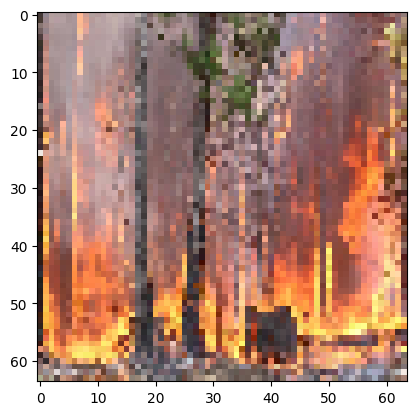

In [19]:
# Test 1

img_show('Dataset/test_set/with fire/cumming_forest_fires.jpg')
testing('Dataset/test_set/with fire/cumming_forest_fires.jpg')

1/1 [==============================] - 0s 89ms/step
Predicted class as: No Issues


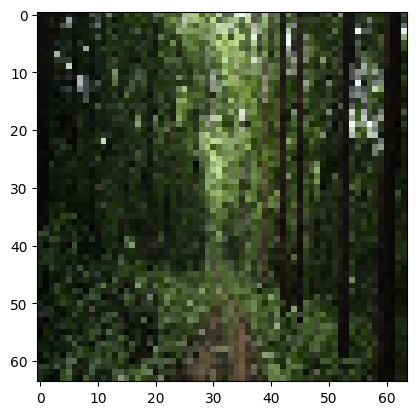

In [20]:
# Test 2

img_show('Dataset/test_set/forest/0.98884800_1554454572_spin.jpg')
testing('Dataset/test_set/forest/0.98884800_1554454572_spin.jpg')